In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

In [2]:
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
mu = -0.05
lamb = -1
A = np.array([[mu,0,0],[0,lamb,-lamb],[0,0,2*mu]]) # Koopman linear dynamics
D,T = np.linalg.eig(A)
slope_stab_man = T[2,2]/T[1,2] # slope of stable subspace (green)


In [4]:
## Integrate Koopman trajectories

y0A = np.array([1.5,-1,2.25])
y0B = np.array([1,-1,1])
y0C = np.array([2,-1,4])
tspan = np.arange(0,1000,0.01)

def koopman_deriv(y,t0,A=A):
    return A@y

yA = integrate.odeint(koopman_deriv, y0A, tspan)
yB = integrate.odeint(koopman_deriv, y0B, tspan)
yC = integrate.odeint(koopman_deriv, y0C, tspan)


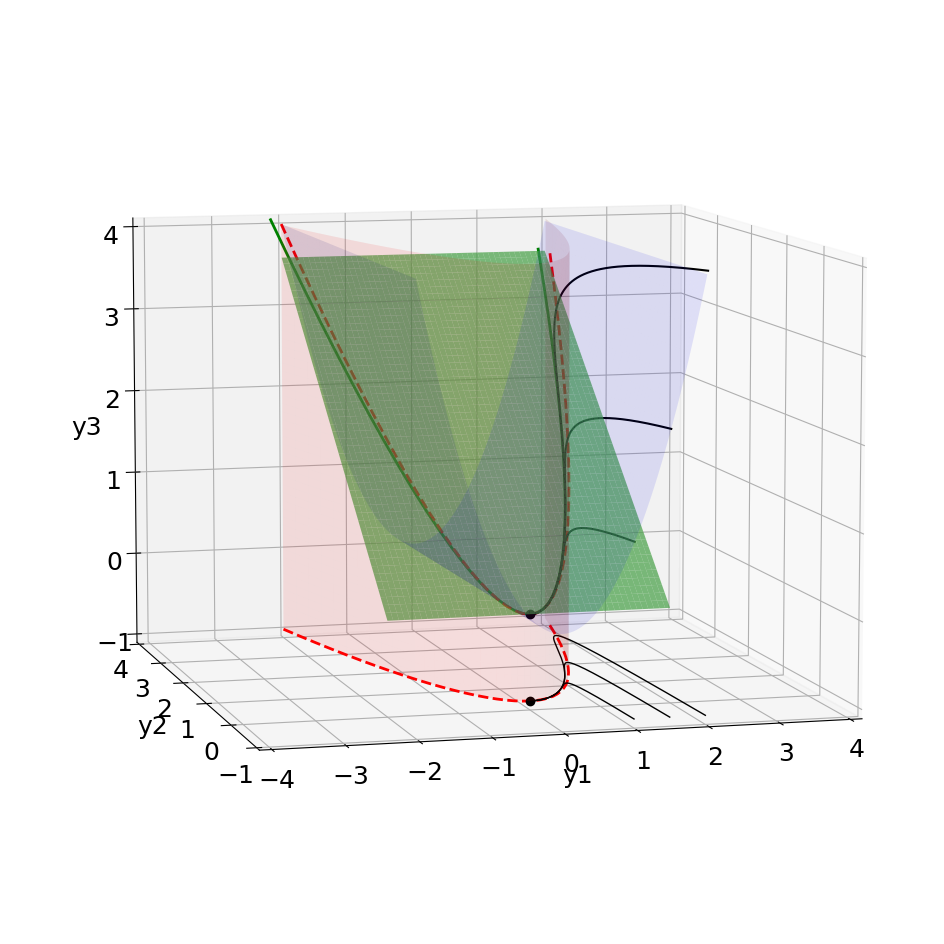

In [5]:
## Plot invariant surfaces
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

# Attracting manifold y_2 = y_1^2  (red manifold)
X,Z = np.meshgrid(np.arange(-2,2,0.01),np.arange(-1,4,0.01))
Y = np.power(X,2)

ax.plot_surface(X,Y,Z,alpha=0.1,color='r',shade=True)

# Invariant set y_3 = y_1^2  (blue manifold)
X1,Y1 = np.meshgrid(np.arange(-2,2,0.01),np.arange(-1,4,0.01))
Z1 = np.power(X1,2)

ax.plot_surface(X1,Y1,Z1,alpha=0.1,color='b',shade=True)

# Stable invariant subspace of Koopman linear system  (green plane)
X2,Y2 = np.meshgrid(np.arange(-2,2,0.01),np.arange(0,4,0.01))
Z2 = slope_stab_man*Y2

ax.plot_surface(X2,Y2,Z2,alpha=0.7,color=(0.3,0.7,0.3),shade=True)

x = np.arange(-2,2,0.1)
# Intersection of green and blue surfaces (below)
ax.plot(x,(1/slope_stab_man)*np.power(x,2),np.power(x,2),color='g',linewidth=2)

# Intersection of red and blue surfaces (below)
ax.plot(x,np.power(x,2),np.power(x,2),'--',color='r',linewidth=2)
ax.plot(x,np.power(x,2),-np.ones_like(x),'--',color='r',linewidth=2)

# Plot Koopman Trajectories
ax.plot(yA[:,0],yA[:,1],-np.ones_like(yA[:,0]),'k-',linewidth=1)
ax.plot(yB[:,0],yB[:,1],-np.ones_like(yB[:,0]),'k-',linewidth=1)
ax.plot(yC[:,0],yC[:,1],-np.ones_like(yC[:,0]),'k-',linewidth=1)

ax.plot(yA[:,0],yA[:,1],yA[:,2],'k-',linewidth=1.5)
ax.plot(yB[:,0],yB[:,1],yB[:,2],'k-',linewidth=1.5)
ax.plot(yC[:,0],yC[:,1],yC[:,2],'k-',linewidth=1.5)

ax.plot(np.array([0,0]),np.array([0,0]),np.array([0,-1]),'ko')

ax.view_init(azim=-105,elev=8)

ax.set_xlim(-4,4)
ax.set_ylim(-1,4)
ax.set_zlim(-1,4)

ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')

plt.show()